In [1]:
import os
import warnings
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

col_names =  ["Locality",     
              "Type_of_property",
              "Subtype_of_property",
              "Price",
              "Type_of_sale",
              "Number_of_rooms",
              "Living_Area",
              "Fully_equipped_kitchen",
              "Furnished",
              "Open_fire",
              "Terrace",
              "Terrace_Area",
              "Garden",
              "Garden_Area",
              "Surface_area_of_the_plot_of_land",
              "Number_of_facades",
              "Swimming_pool",
              "State_of_the_building"
              ]

file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\main_csv.csv" 
df_final = pd.read_csv(file_path)
#df_final = df_final.dropna(subset=['State_of_the_building'])

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df_final["State_of_the_building"] = df_final["State_of_the_building"].fillna("NAN")

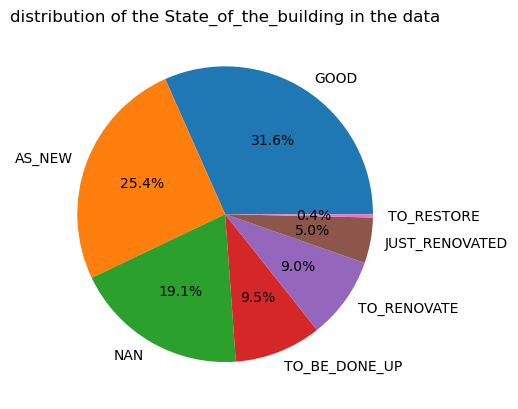

In [3]:
df_final["State_of_the_building"] = df_final["State_of_the_building"].fillna("NAN")
freq_type = df_final["State_of_the_building"].value_counts()
plt.pie(freq_type, labels=freq_type.index, autopct='%1.1f%%')
plt.title("distribution of the State_of_the_building in the data")
plt.show()

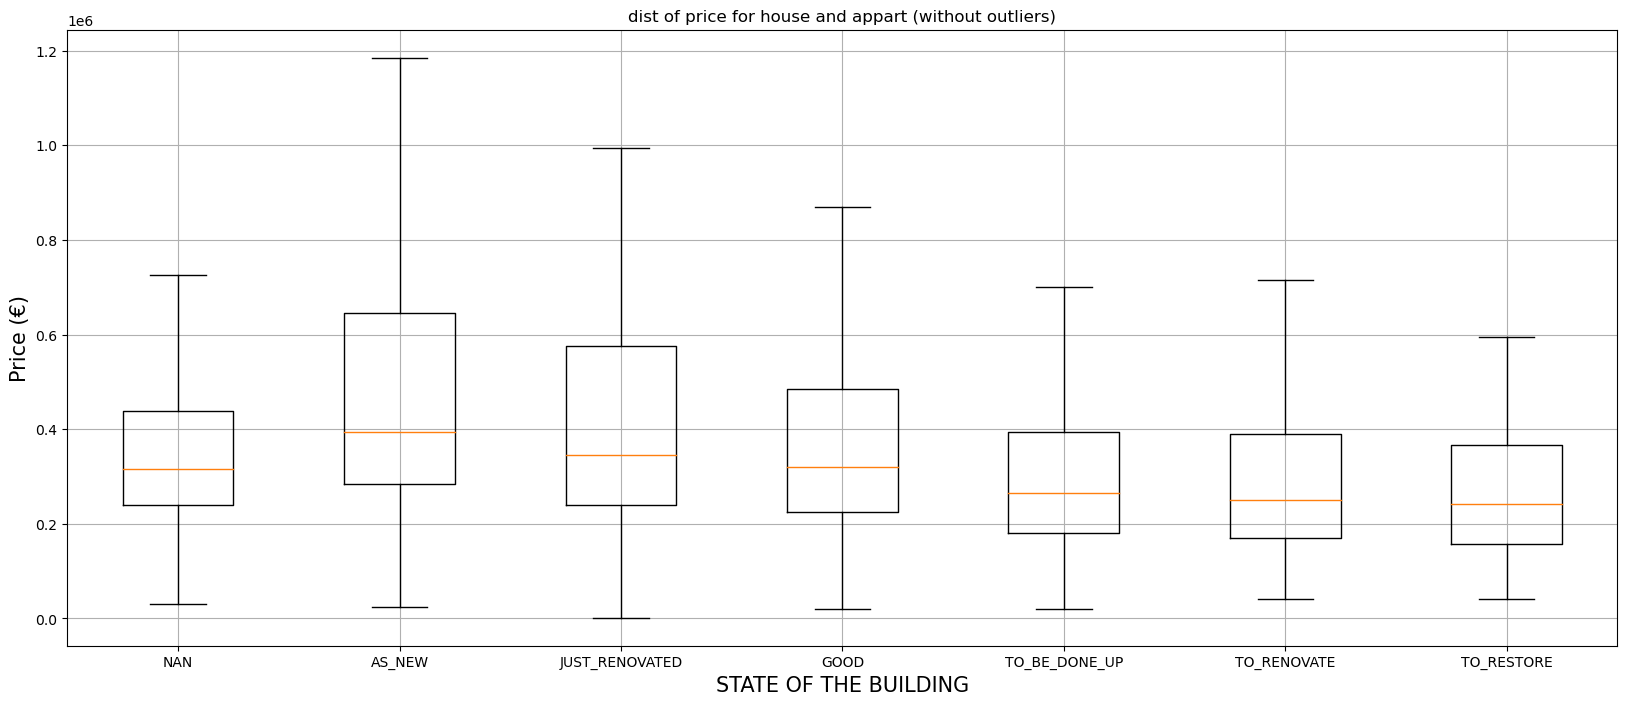

In [7]:
df_nan = df_final[df_final['State_of_the_building'] == "NAN"]
df_AS_NEW = df_final[df_final['State_of_the_building'] == "AS_NEW" ]
df_JUST = df_final[df_final['State_of_the_building'] == "JUST_RENOVATED" ]
df_GOOD = df_final[df_final['State_of_the_building'] == "GOOD" ]
df_TO = df_final[df_final['State_of_the_building'] == "TO_RENOVATE" ]
df_RESTORE = df_final[df_final['State_of_the_building'] == "TO_RESTORE" ]
df_DONE_UP = df_final[df_final['State_of_the_building'] == "TO_BE_DONE_UP" ]

plt.figure(figsize=(20, 8))
plt.boxplot([df_nan['Price'], df_AS_NEW['Price'], df_JUST['Price'], df_GOOD['Price'], df_DONE_UP['Price'], df_TO['Price'], df_RESTORE['Price']], 
            showfliers=False, 
            labels=['NAN', 'AS_NEW', 'JUST_RENOVATED', 'GOOD', 'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE'])
plt.xlabel('STATE OF THE BUILDING', fontsize=15)
plt.ylabel("Price (€)", fontsize=15)
plt.title("dist of price for house and appart (without outliers)")
plt.grid(True)

plt.show()

## test

In [11]:
import os
import warnings
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

col_names =  ["Locality",     
              "Type_of_property",
              "Subtype_of_property",
              "Price",
              "Type_of_sale",
              "Number_of_rooms",
              "Living_Area",
              "Fully_equipped_kitchen",
              "Furnished",
              "Open_fire",
              "Terrace",
              "Terrace_Area",
              "Garden",
              "Garden_Area",
              "Surface_area_of_the_plot_of_land",
              "Number_of_facades",
              "Swimming_pool",
              "State_of_the_building"
              ]

file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\main_csv.csv" 
df_final = pd.read_csv(file_path)
df_final = df_final.dropna(subset=['State_of_the_building'])

In [12]:
df_final = df_final.replace({"State_of_the_building":{"AS_NEW": 1, "JUST_RENOVATED": 2, "GOOD": 3, "TO_BE_DONE_UP": 4, "TO_RENOVATE": 5, "TO_RESTORE": 6}})

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

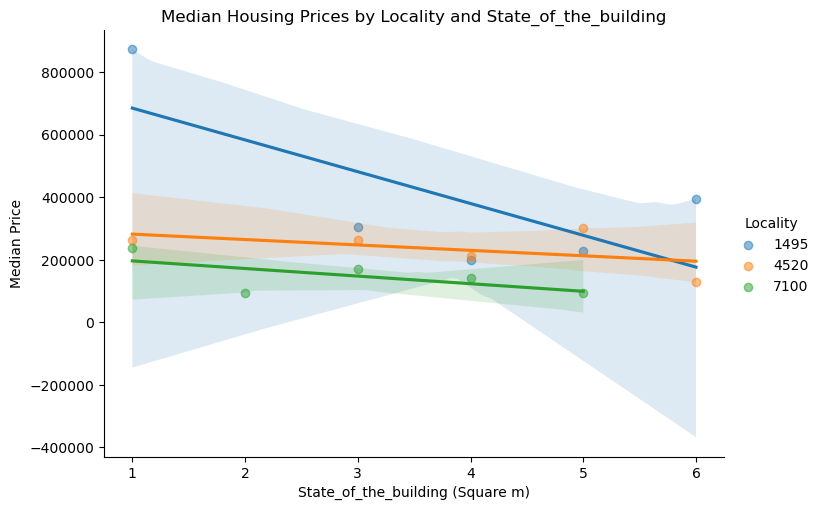

In [14]:
# Compute the median price by number of rooms for each locality
groupby_area = df_final.groupby(["Locality", "State_of_the_building"])["Price"].median().reset_index()

desired_localities = [1495, 4520, 7100]
groupby_area = groupby_area.loc[groupby_area['Locality'].isin(desired_localities)]

# Increase the size of the plot
plt.figure(figsize=(10,5))

# Create the scatter plot
sns.lmplot(x="State_of_the_building", y="Price", hue="Locality", data=groupby_area, scatter_kws={'alpha':0.5}, aspect=1.5)

# Add x and y axis labels
plt.xlabel('State_of_the_building (Square m)')
plt.ylabel('Median Price')

# Add a title to the plot
plt.title('Median Housing Prices by Locality and State_of_the_building')

plt.show